In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms # data preprocessing
from torch.utils.data import DataLoader     # mini-batch

import torch.nn as nn                       # loss
import torch.optim as optim                 # optimizer

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Pytorch/DL bro/cifar10/'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root=path+'data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=path+'data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


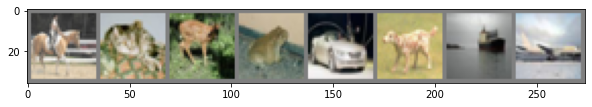

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,5))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:8]))

In [ ]:
model = torchvision.models.resnet50(pretrained=True).to(device)
# If True, returns a model pre-trained on ImageNet
# transfer the model to the GPU

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

In [ ]:
i = 0
for name, param in model.named_parameters():
    i+=1
    print(i, name)
    param.requires_grad = False
    if i == 159:                    # fc를 제외하고 모든 layer를 freezing
        break

### another method

# for param in model.parameters():
#     param.requires_grad = False
# model.fc.weight.requires_grad = True

1 conv1.weight
2 bn1.weight
3 bn1.bias
4 layer1.0.conv1.weight
5 layer1.0.bn1.weight
6 layer1.0.bn1.bias
7 layer1.0.conv2.weight
8 layer1.0.bn2.weight
9 layer1.0.bn2.bias
10 layer1.0.conv3.weight
11 layer1.0.bn3.weight
12 layer1.0.bn3.bias
13 layer1.0.downsample.0.weight
14 layer1.0.downsample.1.weight
15 layer1.0.downsample.1.bias
16 layer1.1.conv1.weight
17 layer1.1.bn1.weight
18 layer1.1.bn1.bias
19 layer1.1.conv2.weight
20 layer1.1.bn2.weight
21 layer1.1.bn2.bias
22 layer1.1.conv3.weight
23 layer1.1.bn3.weight
24 layer1.1.bn3.bias
25 layer1.2.conv1.weight
26 layer1.2.bn1.weight
27 layer1.2.bn1.bias
28 layer1.2.conv2.weight
29 layer1.2.bn2.weight
30 layer1.2.bn2.bias
31 layer1.2.conv3.weight
32 layer1.2.bn3.weight
33 layer1.2.bn3.bias
34 layer2.0.conv1.weight
35 layer2.0.bn1.weight
36 layer2.0.bn1.bias
37 layer2.0.conv2.weight
38 layer2.0.bn2.weight
39 layer2.0.bn2.bias
40 layer2.0.conv3.weight
41 layer2.0.bn3.weight
42 layer2.0.bn3.bias
43 layer2.0.downsample.0.weight
44 layer2.0.d

In [ ]:
# 특정 layer 내의 conv 또는 특정 layer 전체를 freezing

# model.layer3.0.conv3.requires_grad = False --> 0을 숫자로 인식하여 오류
model.layer3[0].conv3.requires_grad = False
model.layer4.requires_grad = False

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
old_loss = 10
PATH = path + 'cifar_model.pth'

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    cost = running_loss / len(trainloader)
    print('[%d] loss: %.3f'%(epoch+1, cost))
    if cost < old_loss:
        print('Save the best model')
        torch.save(model.state_dict(), PATH)
        old_loss = cost

print('Finished Training')

[1] loss: 1.632
Save the best model
[2] loss: 1.466
Save the best model
Finished Training


In [ ]:
# model = torchvision.models.resnet50(pretrained=False).to(device)
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%'%(
    100*correct/total)
)

Accuracy of the network on the 10000 test images: 50 %
